## BANK LOAN ANALYSIS

In [191]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [192]:
#import data
df=pd.read_excel(r"C:\Users\ajoal\OneDrive\Desktop\financial_loan.xlsx")

### Overview of Data

In [193]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [194]:
#Number of rows and columns
df.shape

(38576, 24)

In [195]:
#Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

In [196]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


In [197]:
#Check for duplicates
df[df.duplicated()]

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment


### Basic Info

In [198]:
#Total loan applications
total_loan_applications=df['id'].count()
print(total_loan_applications)

38576


In [199]:
#Total funded amount
total_funded_amount = df['loan_amount'].sum()
print(total_funded_amount)

435757075


In [200]:
#Total recieved amount
total_amount_recieved = df['total_payment'].sum()
print(total_amount_recieved)

473070933


In [201]:
#Average interest rate
avg_interest_rate=df['int_rate'].mean()*100
print('{:.2f}%'.format(avg_interest_rate))

12.05%


In [202]:
#Average debt-to-income rate
avg_dti_rate=df['dti'].mean()*100
print('{:.2f}%'.format(avg_interest_rate))

12.05%


### Good Loan vs Bad Loan

In [203]:
#Good Loan details
good_loans=df[df['loan_status'].isin(['Fully Paid','Current'])]

good_loan_applications = good_loans['id'].count()
good_loan_funded_amount = good_loans['loan_amount'].sum()
good_loan_recieved = good_loans['total_payment'].sum()
good_loan_percentage = (good_loan_applications/total_loan_applications)*100

print('Good Loan Applications :',good_loan_applications)
print('Good Loan Funded Amount : ${:.2f}M'.format(good_loan_funded_amount/1000000))
print('Good Loan Recieved Amount : ${:.2f}M'.format(good_loan_recieved/1000000))
print('Percentage of Good Loan Applications : {:.2f}%'.format(good_loan_percentage))

Good Loan Applications : 33243
Good Loan Funded Amount : $370.22M
Good Loan Recieved Amount : $435.79M
Percentage of Good Loan Applications : 86.18%


In [204]:
#Bad Loan details
bad_loans=df[df['loan_status'].isin(['Charged Off'])]

bad_loan_applications = bad_loans['id'].count()
bad_loan_funded_amount = bad_loans['loan_amount'].sum()
bad_loan_recieved = bad_loans['total_payment'].sum()
bad_loan_percentage = (bad_loan_applications/total_loan_applications)*100

print('Bad Loan Applications :',bad_loan_applications)
print('Bad Loan Funded Amount : ${:.2f}M'.format(bad_loan_funded_amount/1000000))
print('Bad Loan Recieved Amount : ${:.2f}M'.format(bad_loan_recieved/1000000))
print('Percentage of Bad Loan Applications : {:.2f}%'.format(bad_loan_percentage))

Bad Loan Applications : 5333
Bad Loan Funded Amount : $65.53M
Bad Loan Recieved Amount : $37.28M
Percentage of Bad Loan Applications : 13.82%


### Montly Trends Visualization

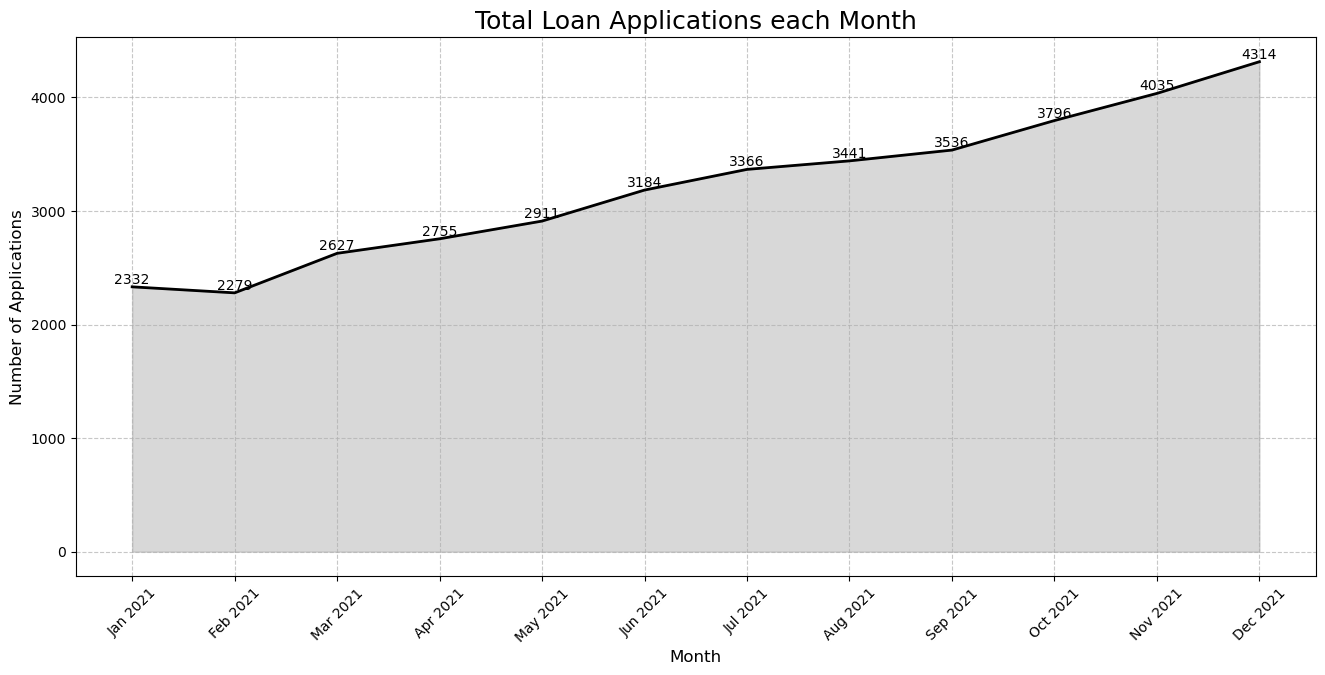

In [205]:
#Plot total applications each month
monthly_applications = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name',sort=False)['id'].count()
      .reset_index(name='loan_applications')
)

plt.figure(figsize=(16,7))
plt.fill_between(monthly_applications['month_name'],monthly_applications['loan_applications'], color='grey', alpha=0.3)
plt.plot(monthly_applications['month_name'], monthly_applications['loan_applications'], color='black', linewidth=2)

for i, row in monthly_applications.iterrows():
    plt.text(i, row['loan_applications']+0.7, f'{row['loan_applications']}',
             ha='center', va='bottom', fontsize=10, color='black')

plt.title('Total Loan Applications each Month', fontsize=18)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Applications', fontsize=12)
plt.xticks(ticks=range(len(monthly_applications)), labels=monthly_applications['month_name'], rotation = 45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

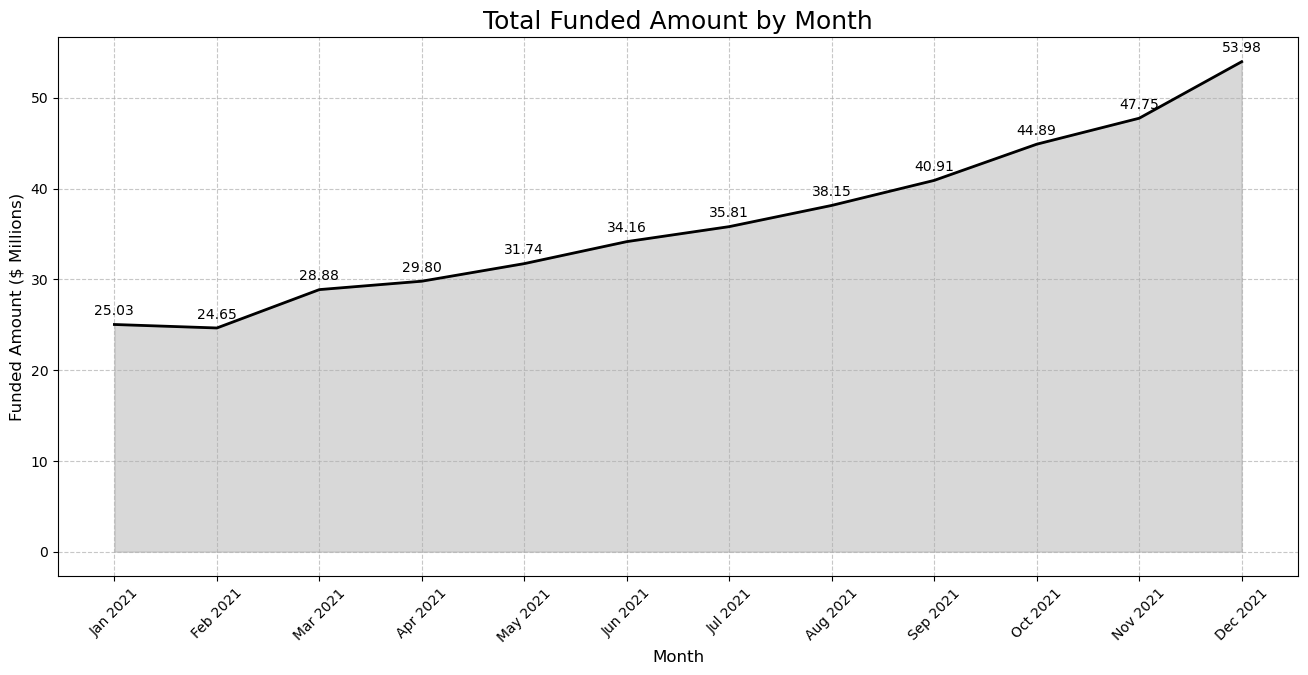

In [206]:
#Plot total amount funded each month
monthly_funded = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name',sort=False)['loan_amount'].sum().div(1000000)
      .reset_index(name='loan_amount_millions')
)

plt.figure(figsize=(16,7))
plt.fill_between(monthly_funded['month_name'],monthly_funded['loan_amount_millions'], color='grey', alpha=0.3)
plt.plot(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color='black', linewidth=2)

for i, row in monthly_funded.iterrows():
    plt.text(i, row['loan_amount_millions']+0.7, f'{row['loan_amount_millions']:.2f}',
             ha='center', va='bottom', fontsize=10, color='black')

plt.title('Total Funded Amount by Month', fontsize=18)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Funded Amount ($ Millions)', fontsize=12)
plt.xticks(ticks=range(len(monthly_funded)), labels=monthly_funded['month_name'], rotation = 45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

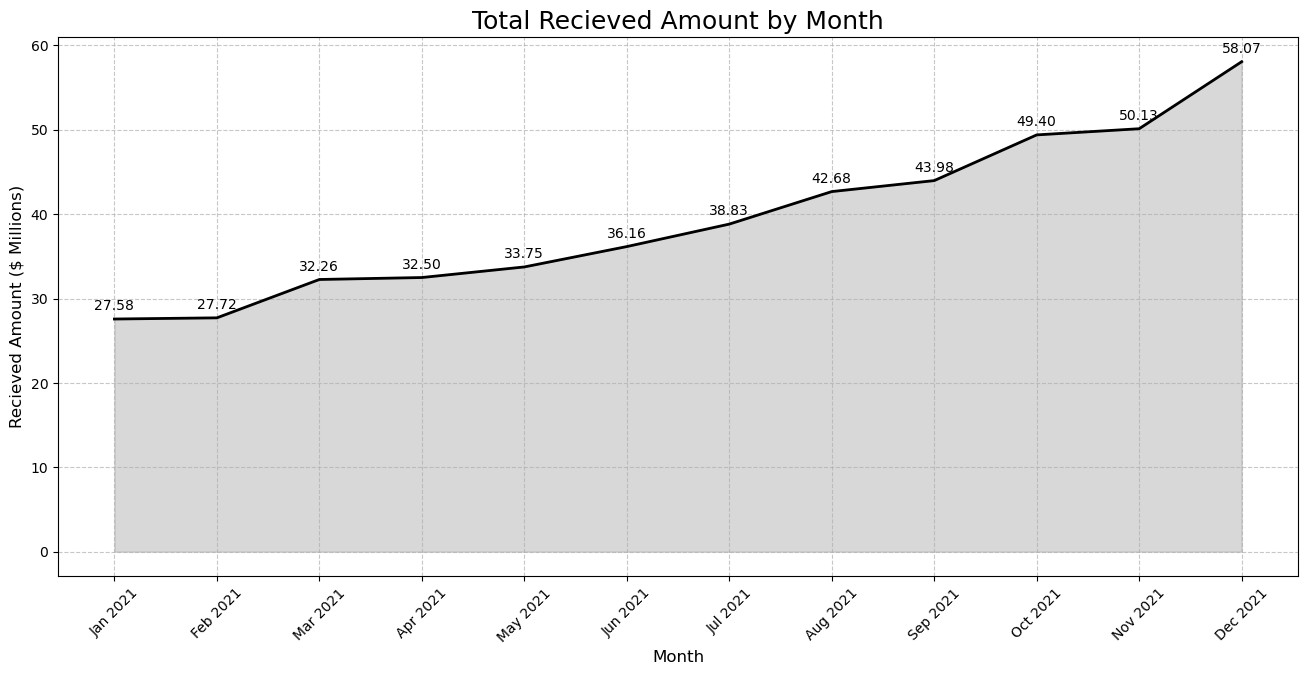

In [207]:
#Plot total amount recieved each month
monthly_recieved = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name',sort=False)['total_payment'].sum().div(1000000)
      .reset_index(name='recieved_amount_millions')
)

plt.figure(figsize=(16,7))
plt.fill_between(monthly_recieved['month_name'],monthly_recieved['recieved_amount_millions'], color='grey', alpha=0.3)
plt.plot(monthly_recieved['month_name'], monthly_recieved['recieved_amount_millions'], color='black', linewidth=2)

for i, row in monthly_recieved.iterrows():
    plt.text(i, row['recieved_amount_millions']+0.7, f'{row['recieved_amount_millions']:.2f}',
             ha='center', va='bottom', fontsize=10, color='black')

plt.title('Total Recieved Amount by Month', fontsize=18)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Recieved Amount ($ Millions)', fontsize=12)
plt.xticks(ticks=range(len(monthly_recieved)), labels=monthly_recieved['month_name'], rotation = 45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### State wise Trends Visualization 

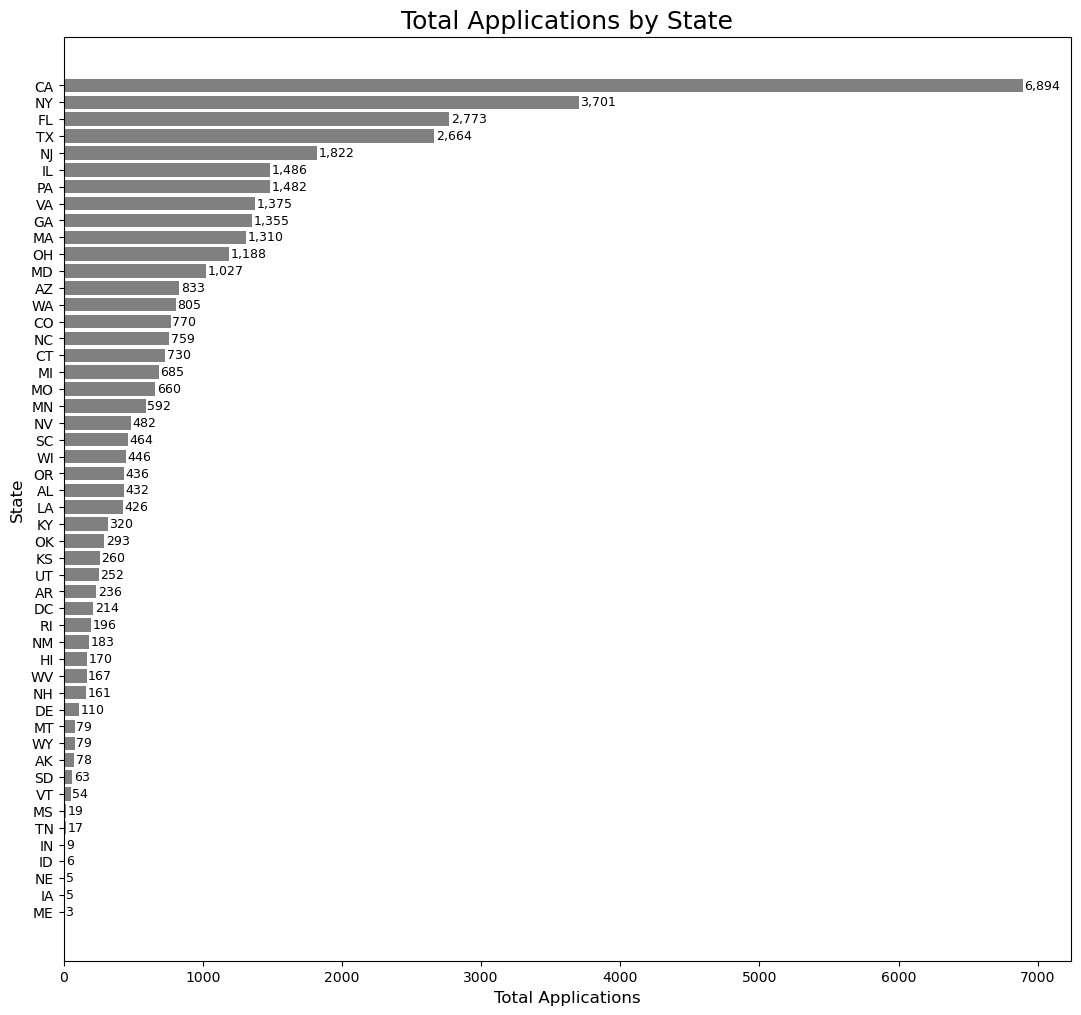

In [208]:
#Plot total applications in each state
state_total_applications= (
    df.groupby('address_state')['id'].count().sort_values()
)

plt.figure(figsize=(13,12))
bars = plt.barh(state_total_applications.index, state_total_applications.values, color = 'grey')

for i in bars:
    width = i.get_width()
    plt.text(width + 10, i.get_y() + i.get_height()/2,
             f'{width:,.0f}', va='center', fontsize=9)

plt.title('Total Applications by State', fontsize=18)
plt.xlabel('Total Applications', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.show()

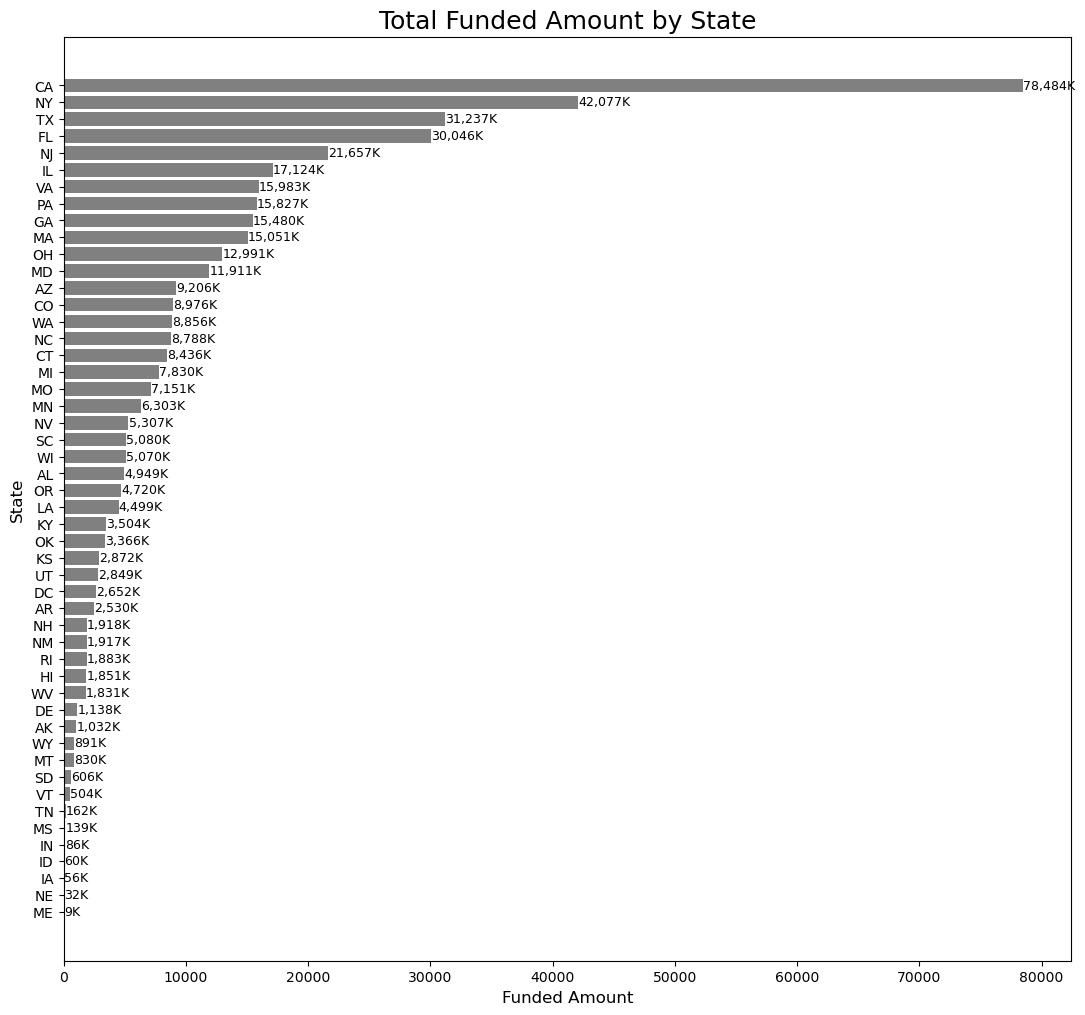

In [209]:
#Plot total amount funded each month
state_funding = (
    (df.groupby('address_state')['loan_amount'].sum().sort_values())/1000
)

plt.figure(figsize=(13,12))
bars = plt.barh(state_funding.index, state_funding.values, color = 'grey')

for i in bars:
    width = i.get_width()
    plt.text(width + 10, i.get_y() + i.get_height()/2,
             f'{width:,.0f}K', va='center', fontsize=9)

plt.title('Total Funded Amount by State', fontsize=18)
plt.xlabel('Funded Amount', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.show()

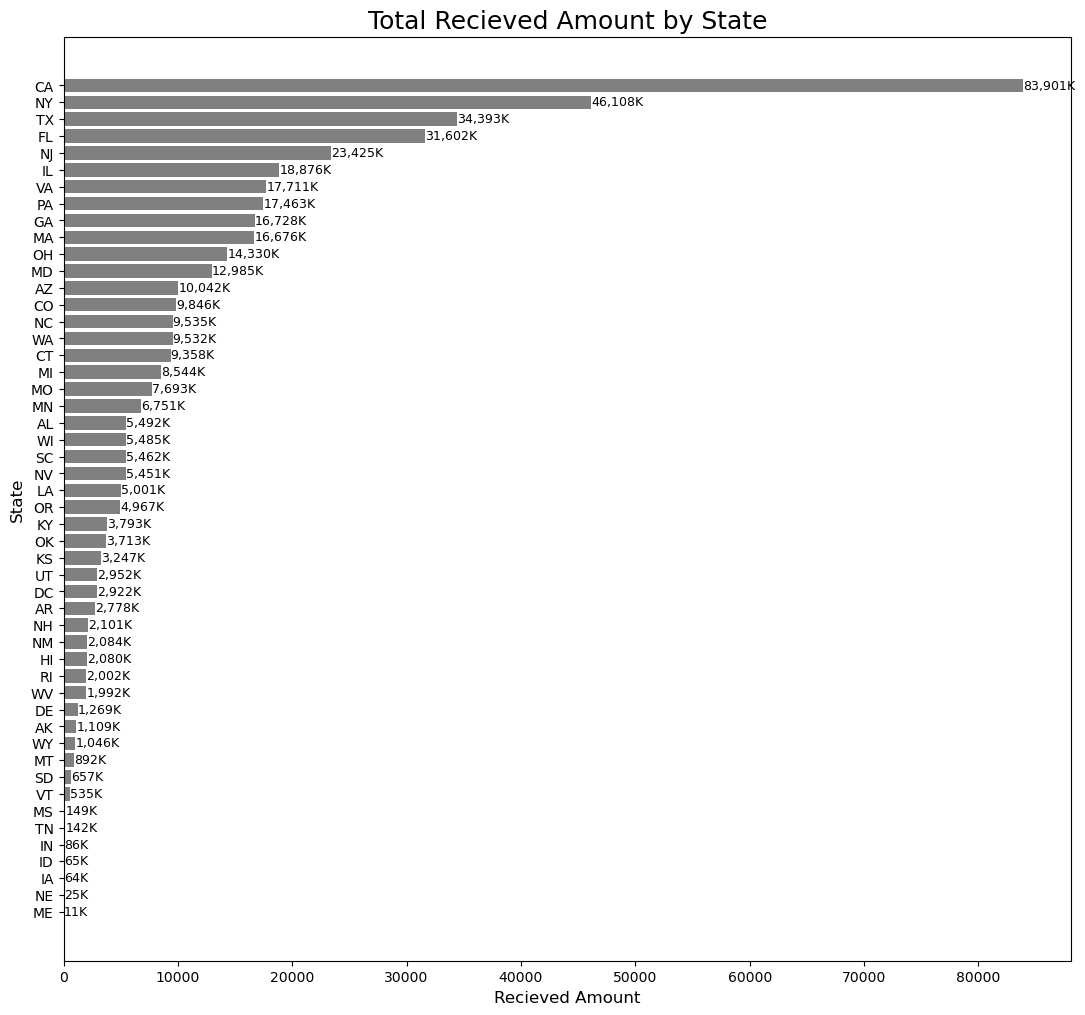

In [210]:
#Plot total amount recieved each month
state_recieved = (
    (df.groupby('address_state')['total_payment'].sum().sort_values())/1000
)

plt.figure(figsize=(13,12))
bars = plt.barh(state_recieved.index, state_recieved.values, color = 'grey')

for i in bars:
    width = i.get_width()
    plt.text(width + 10, i.get_y() + i.get_height()/2,
             f'{width:,.0f}K', va='center', fontsize=9)

plt.title('Total Recieved Amount by State', fontsize=18)
plt.xlabel('Recieved Amount', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.show()

### Term wise Visualization 

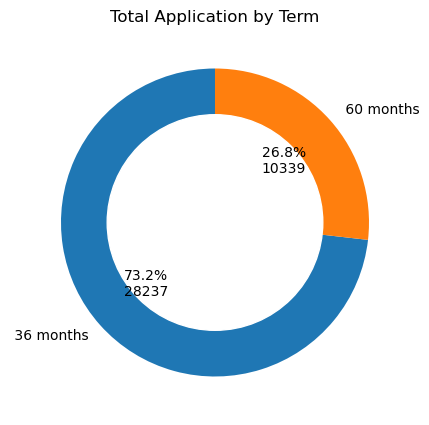

In [211]:
#term analysis by total applications
term_application=df.groupby('term')['id'].count()

plt.figure(figsize=(5,5))
plt.pie(
    term_application,
    labels=term_application.index,
    autopct=lambda p: f'{p:.1f}%\n{p*sum(term_application)/100:.0f}',
    startangle=90,
    wedgeprops={'width': 1},
)
plt.gca().add_artist(plt.Circle((0,0), 0.70, color='white'))
plt.title('Total Application by Term')
plt.show()

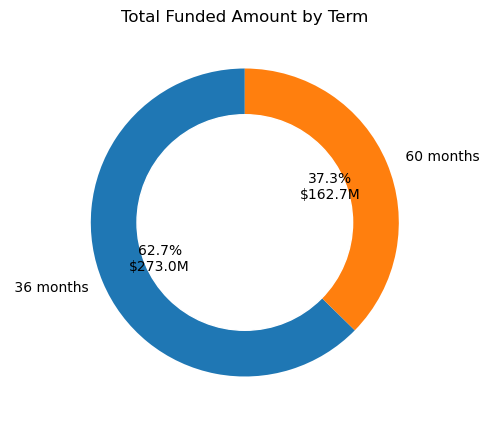

In [212]:
#term analysis by total funded amount
term_funded=df.groupby('term')['loan_amount'].sum()/1000000

plt.figure(figsize=(5,5))
plt.pie(
    term_funded,
    labels=term_funded.index,
    autopct=lambda p: f'{p:.1f}%\n${p*sum(term_funded)/100:.1f}M',
    startangle=90,
    wedgeprops={'width': 1},
)
plt.gca().add_artist(plt.Circle((0,0), 0.70, color='white'))
plt.title('Total Funded Amount by Term')
plt.show()

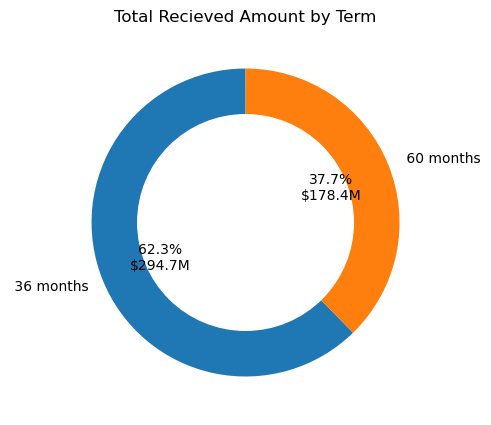

In [213]:
#term analysis by total recieved amount
term_recieved=df.groupby('term')['total_payment'].sum()/1000000

plt.figure(figsize=(5,5))
plt.pie(
    term_recieved,
    labels=term_recieved.index,
    autopct=lambda p: f'{p:.1f}%\n${p*sum(term_recieved)/100:.1f}M',
    startangle=90,
    wedgeprops={'width': 1},
)
plt.gca().add_artist(plt.Circle((0,0), 0.70, color='white'))
plt.title('Total Recieved Amount by Term')
plt.show()

### Employee Length wise Visualization

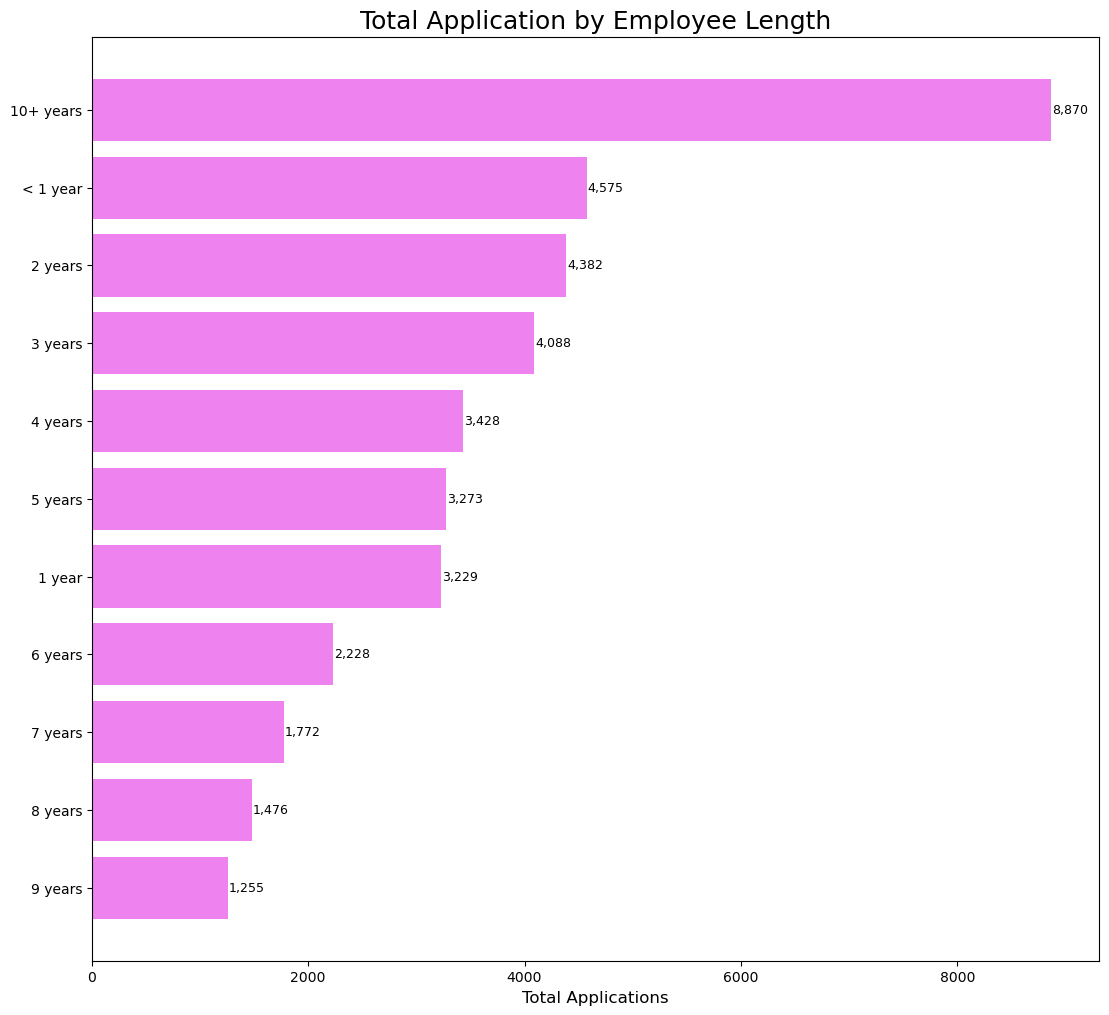

In [214]:
#Plot total application by employee length
emp_application = (
    df.groupby('emp_length')['id'].count().sort_values()
)

plt.figure(figsize=(13,12))
bars = plt.barh(emp_application.index, emp_application.values, color = 'violet')

for i in bars:
    width = i.get_width()
    plt.text(width + 10, i.get_y() + i.get_height()/2,
             f'{width:,.0f}', va='center', fontsize=9)

plt.title('Total Application by Employee Length', fontsize=18)
plt.xlabel('Total Applications', fontsize=12)
plt.show()

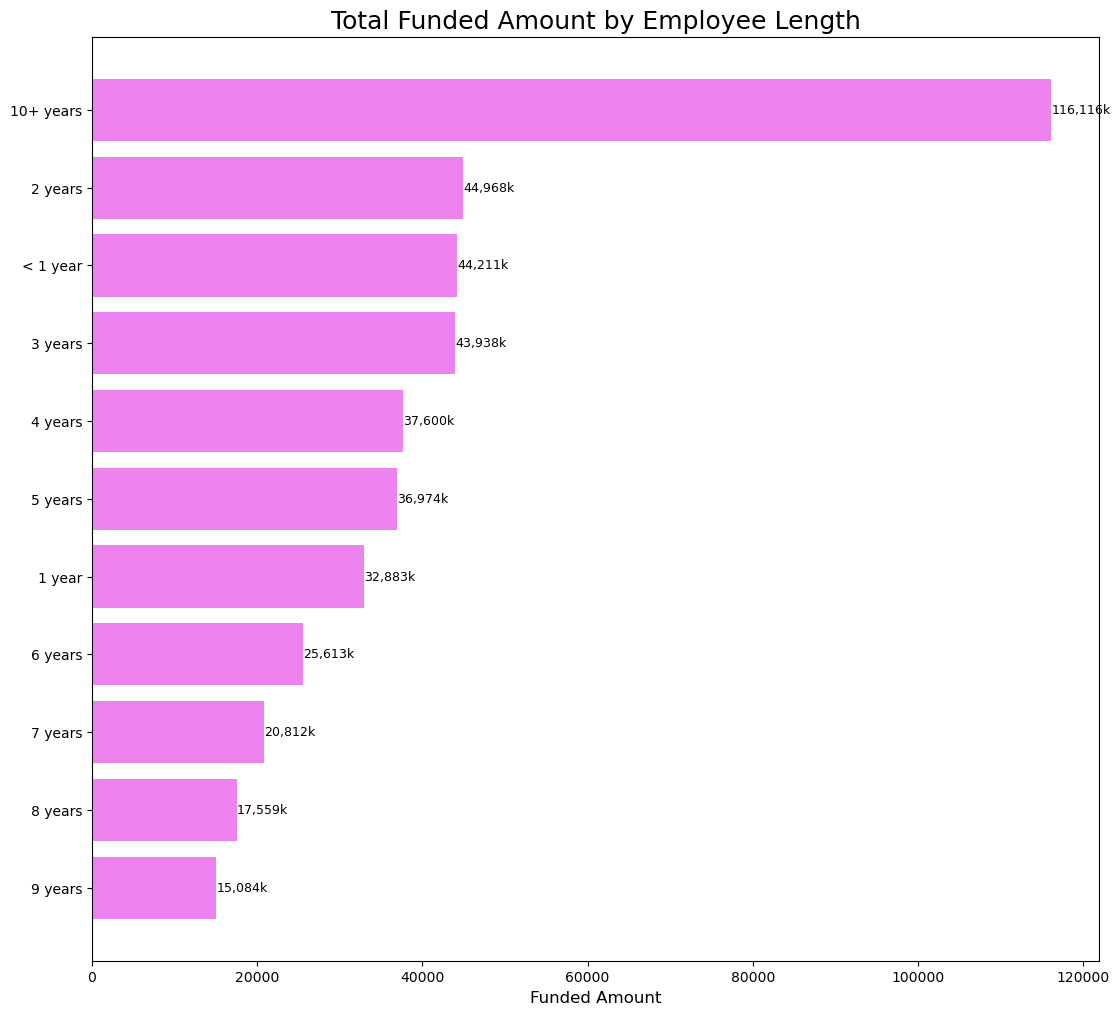

In [215]:
#Plot total funded amount by employee length
emp_funding = (
    (df.groupby('emp_length')['loan_amount'].sum().sort_values())/1000
)

plt.figure(figsize=(13,12))
bars = plt.barh(emp_funding.index, emp_funding.values, color = 'violet')

for i in bars:
    width = i.get_width()
    plt.text(width + 10, i.get_y() + i.get_height()/2,
             f'{width:,.0f}k', va='center', fontsize=9)

plt.title('Total Funded Amount by Employee Length', fontsize=18)
plt.xlabel('Funded Amount', fontsize=12)
plt.show()

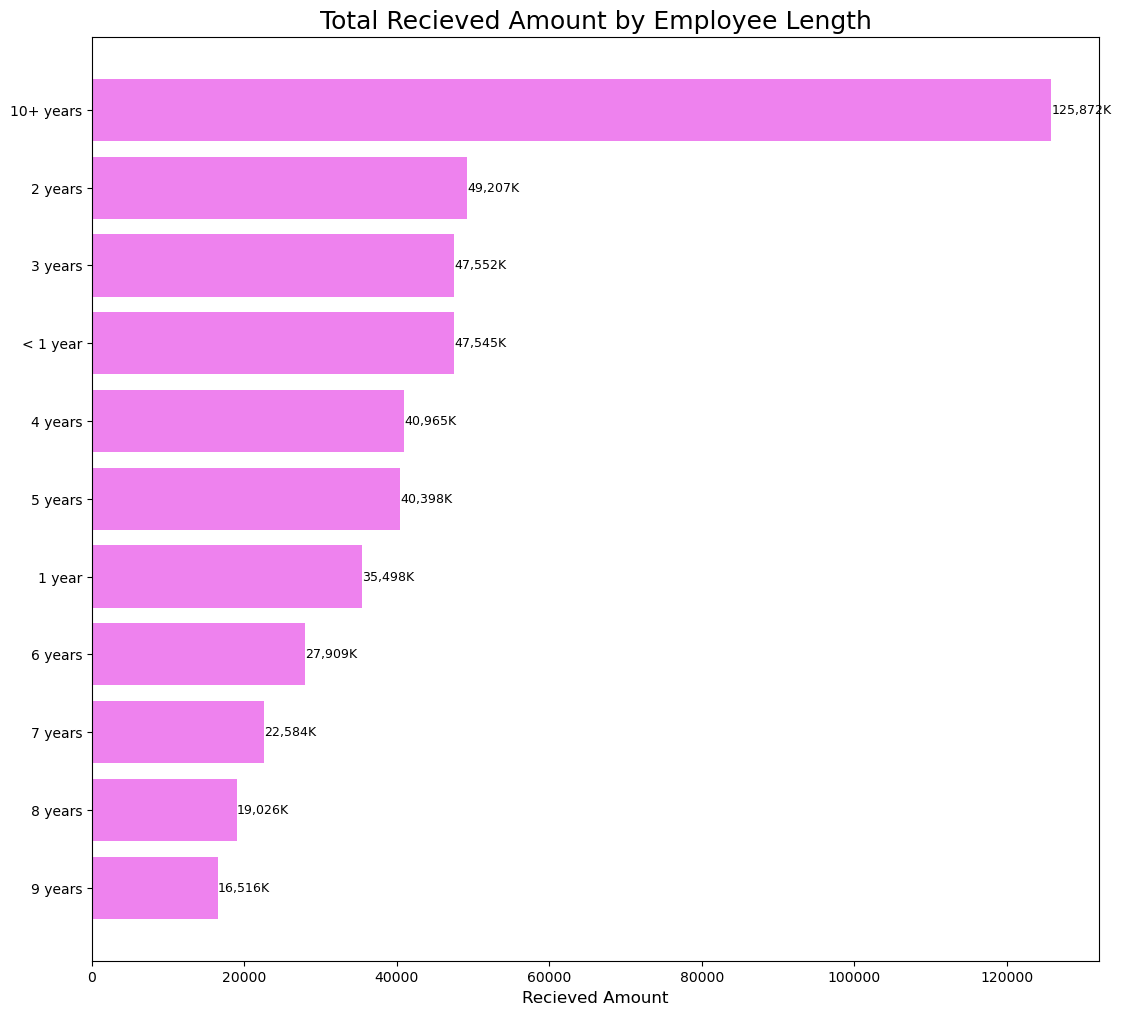

In [216]:
#Plot total recieved amount by employee length 
emp_recieved = (
    (df.groupby('emp_length')['total_payment'].sum().sort_values())/1000
)

plt.figure(figsize=(13,12))
bars = plt.barh(emp_recieved.index, emp_recieved.values, color = 'violet')

for i in bars:
    width = i.get_width()
    plt.text(width + 10, i.get_y() + i.get_height()/2,
             f'{width:,.0f}K', va='center', fontsize=9)

plt.title('Total Recieved Amount by Employee Length', fontsize=18)
plt.xlabel('Recieved Amount', fontsize=12)
plt.show()

### Loan Purpose wise Visualzation

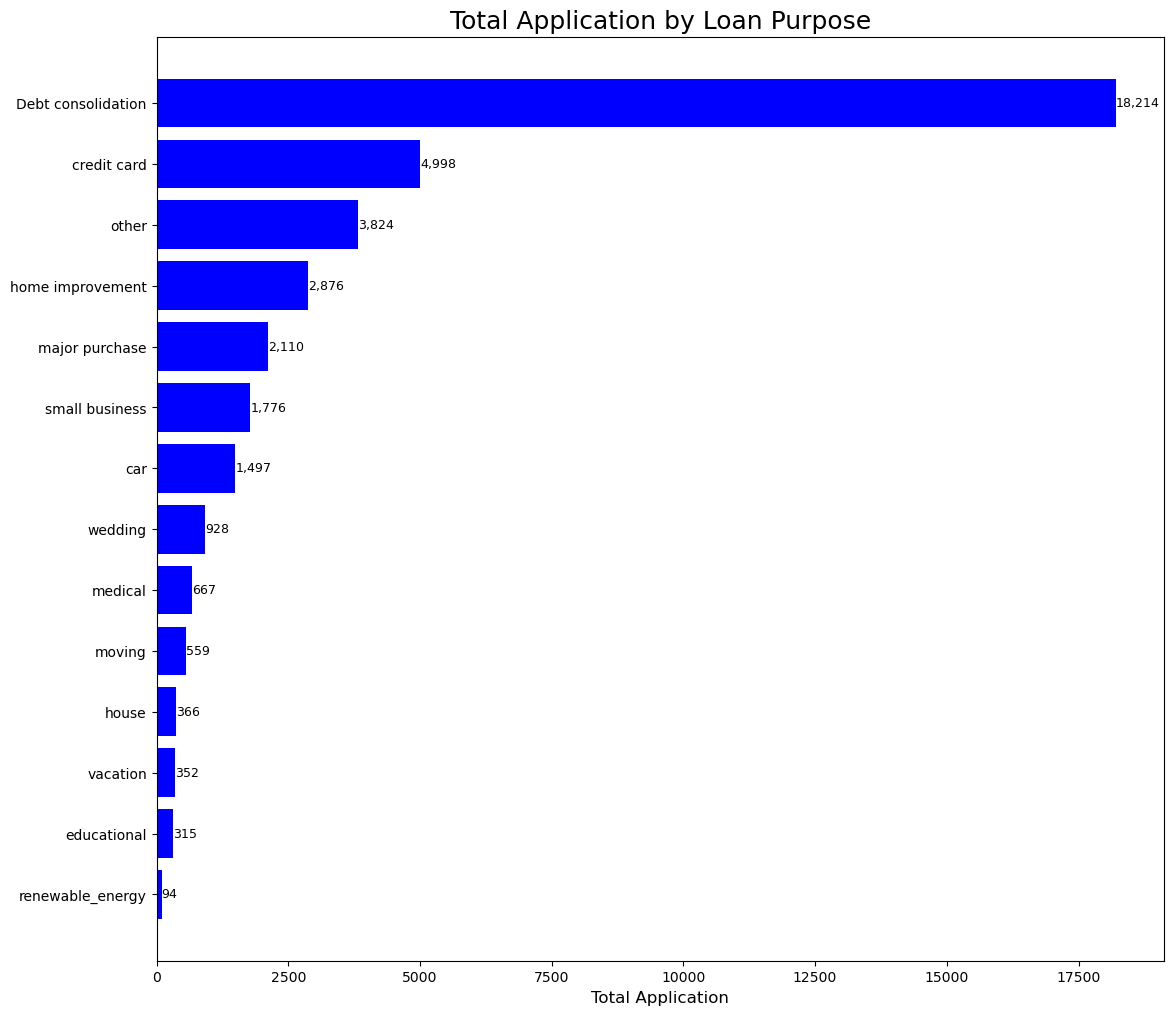

In [217]:
#Plot total application by loan purpose 
purpose_application = (
    df.groupby('purpose')['id'].count().sort_values()
)

plt.figure(figsize=(13,12))
bars = plt.barh(purpose_application.index, purpose_application.values, color = 'blue')

for i in bars:
    width = i.get_width()
    plt.text(width + 0.8, i.get_y() + i.get_height()/2,
             f'{width:,.0f}', va='center', fontsize=9)

plt.title('Total Application by Loan Purpose', fontsize=18)
plt.xlabel('Total Application', fontsize=12)
plt.show()

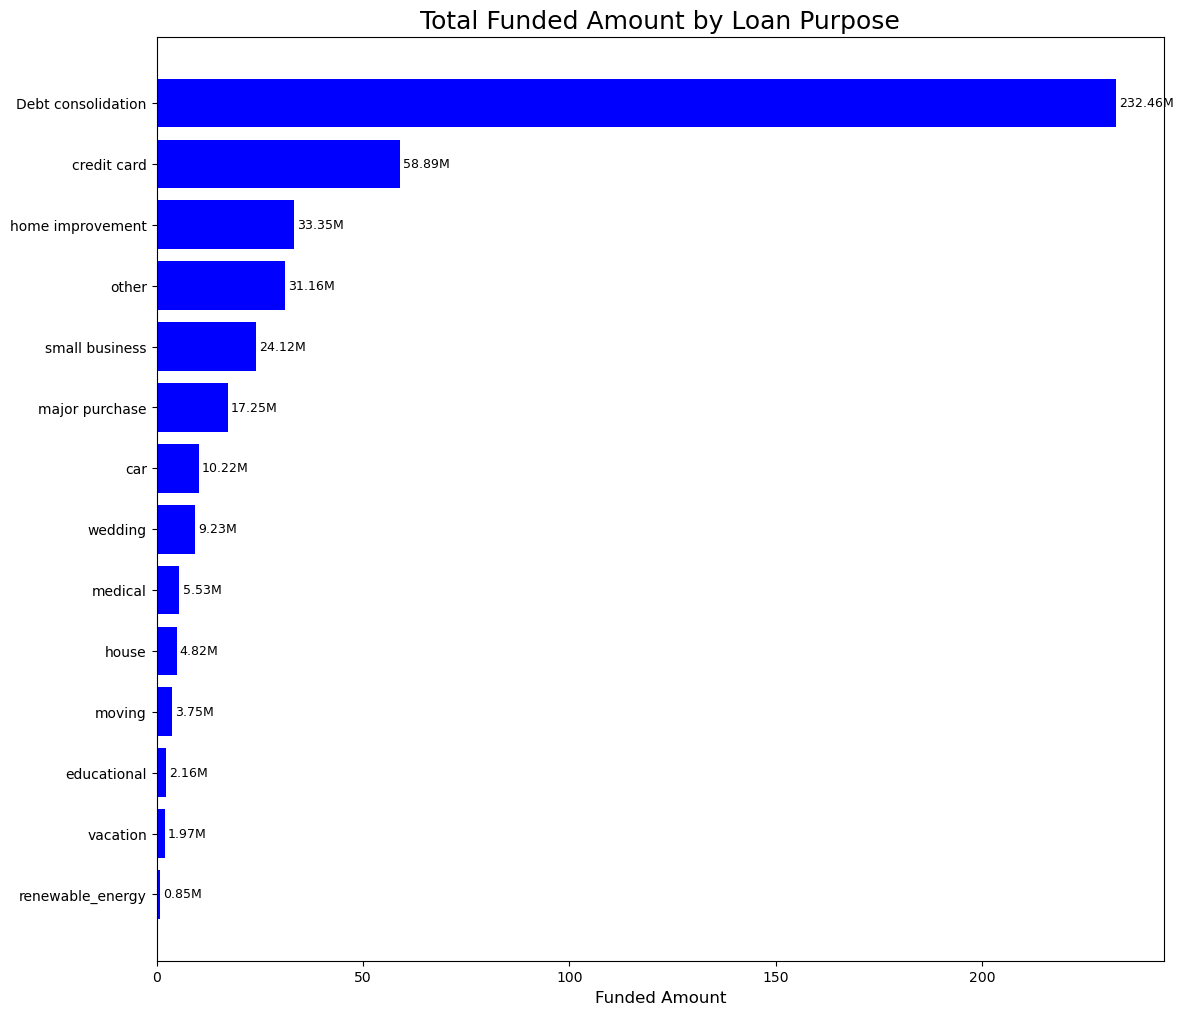

In [218]:
#Plot total funded amount by loan purpose  
purpose_funding = (
    (df.groupby('purpose')['loan_amount'].sum().sort_values())/1000000
)

plt.figure(figsize=(13,12))
bars = plt.barh(purpose_funding.index, purpose_funding.values, color = 'blue')

for i in bars:
    width = i.get_width()
    plt.text(width + 0.8, i.get_y() + i.get_height()/2,
             f'{width:,.2f}M', va='center', fontsize=9)

plt.title('Total Funded Amount by Loan Purpose', fontsize=18)
plt.xlabel('Funded Amount', fontsize=12)
plt.show()

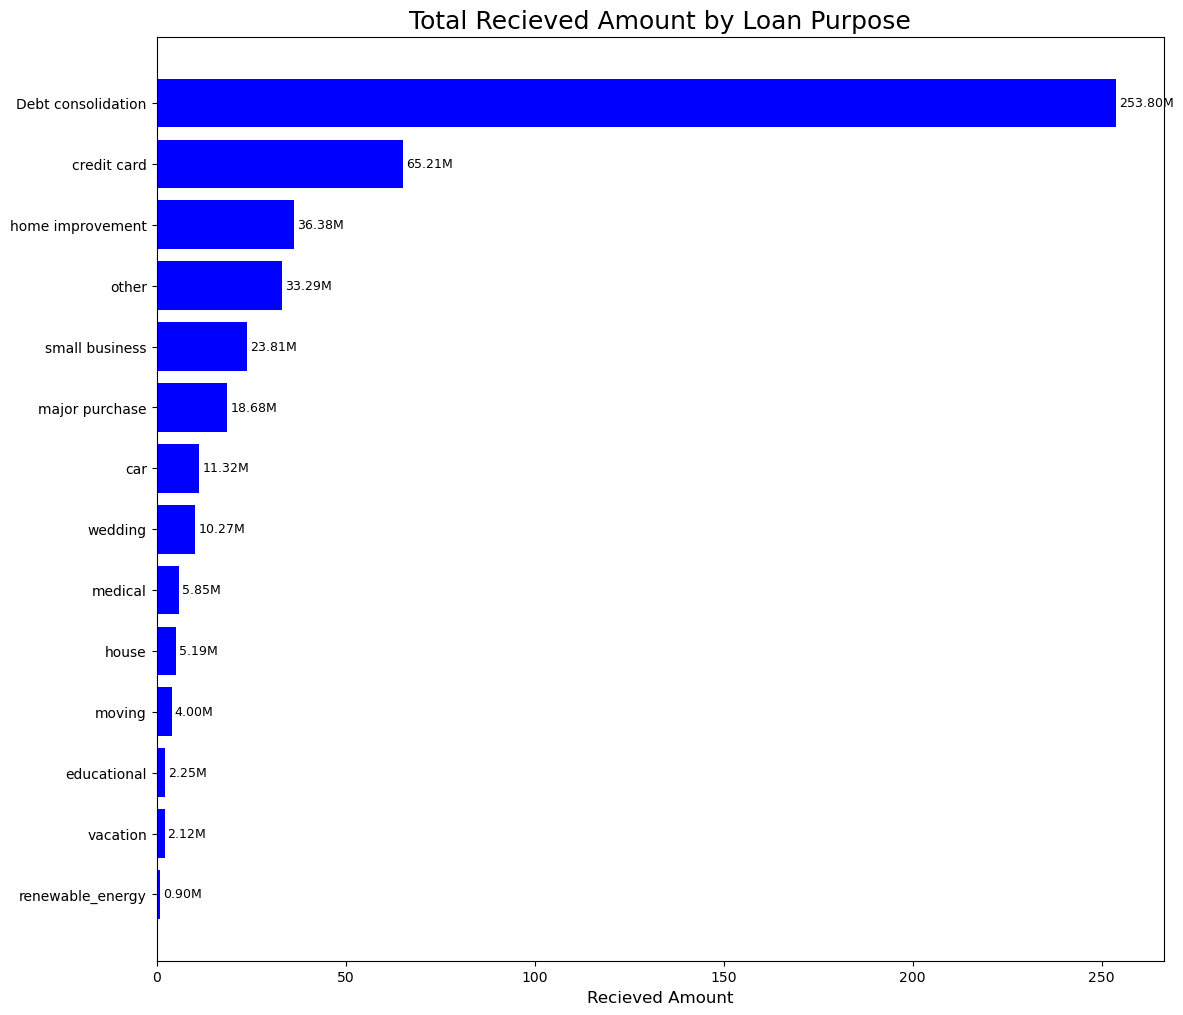

In [219]:
#Plot total recieved amount by loan purpose  
purpose_recieved = (
    (df.groupby('purpose')['total_payment'].sum().sort_values())/1000000
)

plt.figure(figsize=(13,12))
bars = plt.barh(purpose_recieved.index, purpose_recieved.values, color = 'blue')

for i in bars:
    width = i.get_width()
    plt.text(width + 0.8, i.get_y() + i.get_height()/2,
             f'{width:,.2f}M', va='center', fontsize=9)

plt.title('Total Recieved Amount by Loan Purpose', fontsize=18)
plt.xlabel('Recieved Amount', fontsize=12)
plt.show()

### Home Ownership wise Visualization

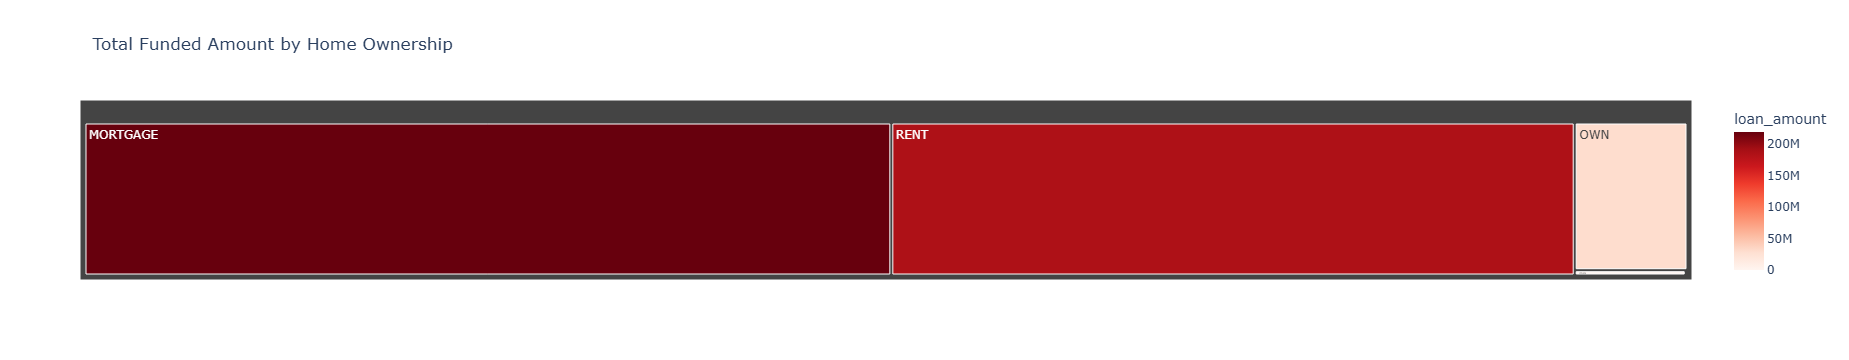

In [220]:
#Plot total funded amount by home ownership
home_funding = df.groupby('home_ownership')['loan_amount'].sum().reset_index()


plot = px.treemap(
    home_funding,
    path=['home_ownership'],
    values='loan_amount',
    color='loan_amount',
    color_continuous_scale='reds',
    title='Total Funded Amount by Home Ownership'
)

plot.show()

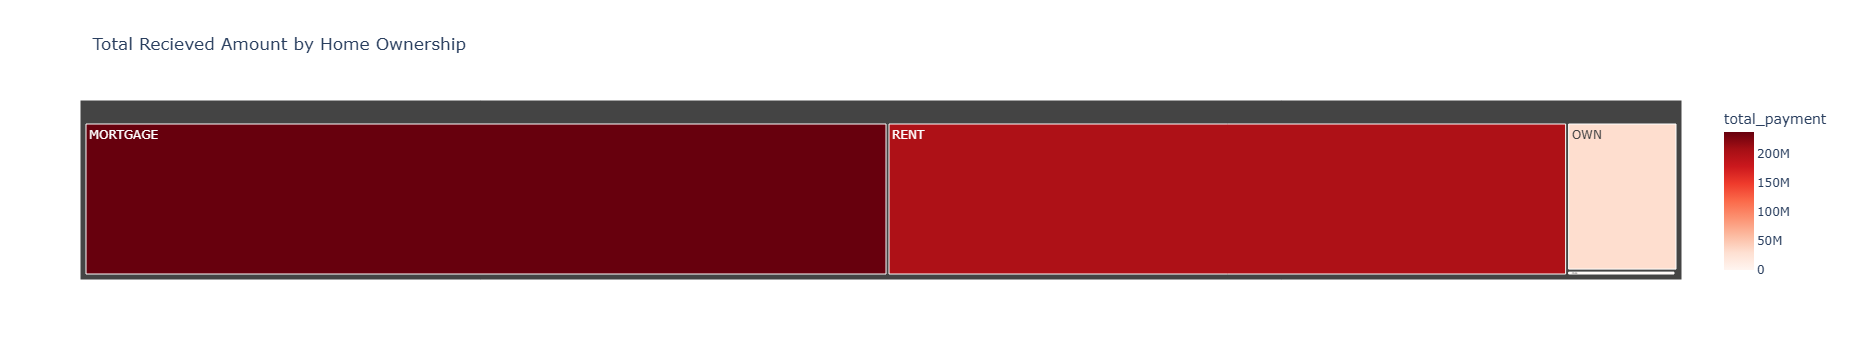

In [221]:
#Plot total recieved amount by home ownership 
home_recieved = df.groupby('home_ownership')['total_payment'].sum().reset_index()

plot = px.treemap(
    home_recieved,
    path=['home_ownership'],
    values='total_payment',
    color='total_payment',
    color_continuous_scale='reds',
    title='Total Recieved Amount by Home Ownership '
)

plot.show()